In [1]:
#Title of the Project : Hill and Valley Project.
#Objectve: To predict Hill and Valley using each 100 points, we need to find out whether they represt hill or Valley.
#Data Source : YBI Foundation Github.
#Libraries are Important and imported here
#import pandas as pd
#Pandas founded by Wes McKinney on 11 January 2008,source:wikipedia.
#Critized for inefficienty requires 5 to 10 times more ram,source: wikipedia
import numpy as np
#Founded by Trevis Oliphant in 2016 as Numpy source: wikipedia
import matplotlib.pyplot as plt
#Founded by John D. Hunter in 2003,source:wikipedid
import seaborn as sns
#Founded by  Michael Waskom,source: StackOverflow
#import data
df=pd.read_csv("C:/Users/acer/Desktop/YBIFOUNDATION/Hill Valley Dataset.csv")
#CSV Files started by IBM Fortan through 1972,source: Wikipedia

In [2]:
#Alternative to head is tail function which finds out the last five columns of the dataset.
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
0,39.02,36.49,38.20,38.85,39.38,39.74,37.02,39.53,38.81,38.79,...,36.62,36.92,38.80,38.52,38.07,36.73,39.46,37.50,39.10,0
1,1.83,1.71,1.77,1.77,1.68,1.78,1.80,1.70,1.75,1.78,...,1.80,1.79,1.77,1.74,1.74,1.80,1.78,1.75,1.69,1
2,68177.69,66138.42,72981.88,74304.33,67549.66,69367.34,69169.41,73268.61,74465.84,72503.37,...,73438.88,71053.35,71112.62,74916.48,72571.58,66348.97,71063.72,67404.27,74920.24,1
3,44889.06,39191.86,40728.46,38576.36,45876.06,47034.00,46611.43,37668.32,40980.89,38466.15,...,42625.67,40684.20,46960.73,44546.80,45410.53,47139.44,43095.68,40888.34,39615.19,0
4,5.70,5.40,5.28,5.38,5.27,5.61,6.00,5.38,5.34,5.87,...,5.17,5.67,5.60,5.94,5.73,5.22,5.30,5.73,5.91,0


In [3]:
df.info()
#Gives class of data set such as series, data frame , set. range of data set or number of enteries. Total Columns.
#type of variables.
#Total Memory used.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Columns: 101 entries, V1 to Class
dtypes: float64(100), int64(1)
memory usage: 956.5 KB


In [4]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,...,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,8169.091881,8144.306262,8192.653738,8176.868738,8128.297211,8173.030008,8188.582748,8183.641543,8154.670066,8120.767574,...,8120.056815,8125.917409,8158.793812,8140.885421,8213.480611,8185.594002,8140.195355,8192.960891,8156.197376,0.500000
std,17974.950461,17881.049734,18087.938901,17991.903982,17846.757963,17927.114105,18029.562695,18048.582159,17982.390713,17900.798206,...,17773.190621,17758.182403,17919.510371,17817.945646,18016.445265,17956.084223,17768.356106,18064.781479,17829.310973,0.500206
min,0.920000,0.900000,0.850000,0.890000,0.880000,0.860000,0.870000,0.650000,0.650000,0.620000,...,0.870000,0.900000,0.870000,0.880000,0.890000,0.890000,0.860000,0.910000,0.890000,0.000000
25%,19.602500,19.595000,18.925000,19.277500,19.210000,19.582500,18.690000,19.062500,19.532500,19.285000,...,19.197500,18.895000,19.237500,19.385000,19.027500,19.135000,19.205000,18.812500,19.145000,0.000000
50%,301.425000,295.205000,297.260000,299.720000,295.115000,294.380000,295.935000,290.850000,294.565000,295.160000,...,297.845000,295.420000,299.155000,293.355000,301.370000,296.960000,300.925000,299.200000,302.275000,0.500000
75%,5358.795000,5417.847500,5393.367500,5388.482500,5321.987500,5328.040000,5443.977500,5283.655000,5378.180000,5319.097500,...,5355.355000,5386.037500,5286.385000,5345.797500,5300.890000,5361.047500,5390.850000,5288.712500,5357.847500,1.000000
max,117807.870000,108896.480000,119031.350000,110212.590000,113000.470000,116848.390000,115609.240000,118522.320000,112895.900000,117798.300000,...,113858.680000,112948.830000,112409.570000,112933.730000,112037.220000,115110.420000,116431.960000,113291.960000,114533.760000,1.000000


In [5]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       ...
       'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100',
       'Class'],
      dtype='object', length=101)

In [6]:
print(df.columns.tolist())

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'Class']


In [7]:
df.shape
#number of rows and columns in the dataset

(1212, 101)

In [8]:
df['Class'].value_counts()
#total values of the Class.

Class
0    606
1    606
Name: count, dtype: int64

In [9]:
df.groupby('Class').mean()
#groupby the elmenents by their mean.

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
Class,,,,,,,,,,,,,,,,,,,,,
0,7913.333251,7825.339967,7902.497294,7857.032079,7775.610198,7875.436337,7804.166584,7722.324802,7793.328416,7686.782046,...,7753.427244,7737.843366,7799.332079,7825.211700,7791.354010,7927.237112,7874.502343,7844.227459,7875.338713,7855.181172
1,8424.850512,8463.272558,8482.810182,8496.705396,8480.984224,8470.623680,8572.998911,8644.958284,8516.011716,8554.753102,...,8478.513399,8502.270264,8452.502739,8492.375924,8490.416832,8499.724109,8496.685660,8436.163251,8510.583069,8457.213581


In [10]:
y=df['Class']

In [11]:
y.shape

(1212,)

In [12]:
y

0       0
1       1
2       1
3       0
4       0
       ..
1207    1
1208    0
1209    1
1210    1
1211    0
Name: Class, Length: 1212, dtype: int64

In [13]:
X=df.drop('Class',axis=1)
#dropping the class 

In [14]:
X.shape

(1212, 100)

In [15]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
0,39.02,36.49,38.20,38.85,39.38,39.74,37.02,39.53,38.81,38.79,...,37.57,36.62,36.92,38.80,38.52,38.07,36.73,39.46,37.50,39.10
1,1.83,1.71,1.77,1.77,1.68,1.78,1.80,1.70,1.75,1.78,...,1.71,1.80,1.79,1.77,1.74,1.74,1.80,1.78,1.75,1.69
2,68177.69,66138.42,72981.88,74304.33,67549.66,69367.34,69169.41,73268.61,74465.84,72503.37,...,69384.71,73438.88,71053.35,71112.62,74916.48,72571.58,66348.97,71063.72,67404.27,74920.24
3,44889.06,39191.86,40728.46,38576.36,45876.06,47034.00,46611.43,37668.32,40980.89,38466.15,...,47653.60,42625.67,40684.20,46960.73,44546.80,45410.53,47139.44,43095.68,40888.34,39615.19
4,5.70,5.40,5.28,5.38,5.27,5.61,6.00,5.38,5.34,5.87,...,5.52,5.17,5.67,5.60,5.94,5.73,5.22,5.30,5.73,5.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,13.00,12.87,13.27,13.04,13.19,12.53,14.31,13.33,13.63,14.55,...,12.89,12.48,12.15,13.15,12.35,13.58,13.86,12.88,13.87,13.51
1208,48.66,50.11,48.55,50.43,50.09,49.67,48.95,48.65,48.63,48.61,...,47.45,46.93,49.61,47.16,48.17,47.94,49.81,49.89,47.43,47.77
1209,10160.65,9048.63,8994.94,9514.39,9814.74,10195.24,10031.47,10202.28,9152.99,9591.75,...,10413.41,9068.11,9191.80,9275.04,9848.18,9074.17,9601.74,10366.24,8997.60,9305.77
1210,34.81,35.07,34.98,32.37,34.16,34.03,33.31,32.48,35.63,32.48,...,33.18,32.76,35.03,32.89,31.91,33.85,35.28,32.49,32.83,34.82


In [16]:
import matplotlib.pyplot as plt
#importing matlplotlib library for plotting

Text(0.5, 1.0, 'Valley')

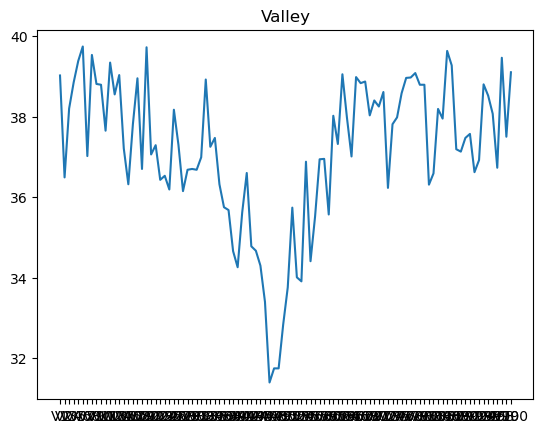

In [18]:
plt.plot(X.iloc[0,:])
plt.title("Valley")


Text(0.5, 1.0, 'Hill')

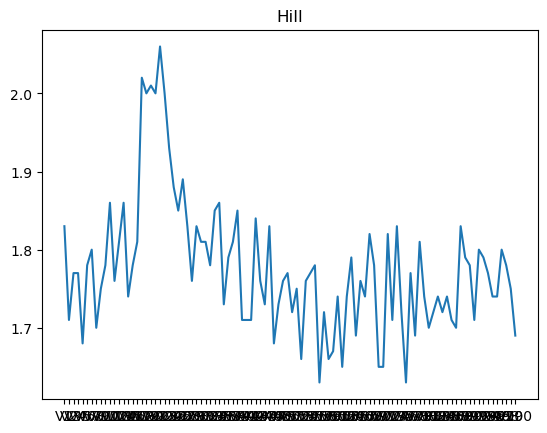

In [19]:
plt.plot(X.iloc[1,:])
plt.title("Hill")

In [20]:
from sklearn.preprocessing import StandardScaler
# StandardScaler brings all the variables in a common scale for processing.

In [21]:
ss = StandardScaler()

In [22]:
X= ss.fit_transform(X)

In [23]:
X

array([[-0.45248681, -0.45361784, -0.45100881, ..., -0.45609618,
        -0.45164274, -0.45545496],
       [-0.45455665, -0.45556372, -0.45302369, ..., -0.45821768,
        -0.45362255, -0.45755405],
       [ 3.33983504,  3.24466709,  3.58338069, ...,  3.5427869 ,
         3.27907378,  3.74616847],
       ...,
       [ 0.11084204,  0.0505953 ,  0.04437307, ...,  0.12533312,
         0.04456025,  0.06450317],
       [-0.45272112, -0.45369729, -0.45118691, ..., -0.45648861,
        -0.45190136, -0.45569511],
       [ 0.01782872, -0.02636986,  0.05196137, ...,  0.03036056,
         0.01087365,  0.03123129]])

In [24]:
X.shape

(1212, 100)

In [25]:
from sklearn.model_selection import train_test_split
#Train Test splits the data into two parts so that first the data can be used to train and then to test.

In [26]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=25)

In [27]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((848, 100), (364, 100), (848,), (364,))

In [28]:
from sklearn.linear_model import LogisticRegression
#importing logistic regression machine learning method

In [29]:
lr = LogisticRegression()
#Developed by Pierre François Verhulst

In [30]:
lr.fit(X_train,y_train)

LogisticRegression()

In [31]:
y_pred = lr.predict(X_test)
#Making Prediction using logistic regression.

In [32]:
y_pred.shape

(364,)

In [33]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,

In [34]:
lr.predict_proba(X_test)

array([[0.52634847, 0.47365153],
       [0.51839717, 0.48160283],
       [0.52650692, 0.47349308],
       [0.52008395, 0.47991605],
       [0.51976102, 0.48023898],
       [0.51995254, 0.48004746],
       [0.66341397, 0.33658603],
       [0.52829618, 0.47170382],
       [0.51160097, 0.48839903],
       [0.51824119, 0.48175881],
       [0.86750545, 0.13249455],
       [0.52681591, 0.47318409],
       [0.53069651, 0.46930349],
       [0.51982768, 0.48017232],
       [0.5200055 , 0.4799945 ],
       [0.53427322, 0.46572678],
       [0.52165282, 0.47834718],
       [0.45586008, 0.54413992],
       [0.73121102, 0.26878898],
       [0.52225953, 0.47774047],
       [0.51992957, 0.48007043],
       [0.51967866, 0.48032134],
       [0.52029808, 0.47970192],
       [0.5202317 , 0.4797683 ],
       [0.46278698, 0.53721302],
       [0.56898149, 0.43101851],
       [0.50549096, 0.49450904],
       [0.37180274, 0.62819726],
       [0.52002243, 0.47997757],
       [0.8578207 , 0.1421793 ],
       [0.

In [35]:
from sklearn.metrics import confusion_matrix,classification_report
#using confusion metric which is combination of precision and recall functions.

In [38]:
print(confusion_matrix(y_test,y_pred))

[[166   3]
 [131  64]]


In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.98      0.71       169
           1       0.96      0.33      0.49       195

    accuracy                           0.63       364
   macro avg       0.76      0.66      0.60       364
weighted avg       0.77      0.63      0.59       364



In [41]:
X_new = df.sample(1)
X_new

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
684,18.21,18.04,18.17,17.49,17.81,17.74,17.81,17.93,17.45,17.49,...,17.78,18.42,18.22,18.03,17.45,17.88,18.25,17.54,18.08,1


In [42]:
X_new.shape

(1, 101)

In [43]:
X_new = X_new.drop('Class',axis=1)
X_new

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
684,18.21,18.04,18.17,17.49,17.81,17.74,17.81,17.93,17.45,17.49,...,18.29,17.78,18.42,18.22,18.03,17.45,17.88,18.25,17.54,18.08


In [44]:
X_new.shape

(1, 100)

In [45]:
X_new = ss.fit_transform(X_new)

In [46]:
y_pred_new =  lr.predict(X_new)

In [47]:
y_pred_new

array([0], dtype=int64)

In [48]:
lr.predict_proba(X_new)

array([[0.50805001, 0.49194999]])